In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = False
nweeks = 41

numbers = {}
numbers['researcher'] = 85
numbers['engineer'] = 61
numbers['student'] = 119

data = pd.read_csv('empreinteCarboneDeplacementDT_202229.tsv', sep='\t', index_col=0)
data

,Jours de déplacement,Statut,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),Tramway JT1 (Km),...,Vélo électrique (kg eCO2),trottinette électrique (kg eCO2),2 roues motorisées (kg eCO2),Voiture (kg eCO2),Bus (kg eCO2),Tramway (kg eCO2),Train (kg eCO2),RER (kg eCO2),Métro (kg eCO2),Total (kg eCO2)
seqID,,,,,,,,,,,,,,,,,,,,,
52392,5,researcher,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,258,0,0,271
52393,3,researcher,0,0,0,0,0,138,0,0,...,0,0,0,4772,0,0,0,0,0,4772
52394,5,researcher,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
52395,5,engineer,0,18,0,0,0,0,0,0,...,0,0,0,85,0,0,0,0,0,100
52396,5,researcher,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,3,researcher,0,0,0,0,0,80,0,0,...,0,0,0,1799,0,0,0,0,0,1799
52808,5,researcher,0,0,0,0,0,80,0,0,...,0,0,0,2998,0,0,0,0,0,2998
52809,5,researcher,0,0,0,0,0,8,0,0,...,0,0,134,113,0,0,0,0,0,248


Remove the outlier student.

In [3]:
data = data.drop(52505)
data

,Jours de déplacement,Statut,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),Tramway JT1 (Km),...,Vélo électrique (kg eCO2),trottinette électrique (kg eCO2),2 roues motorisées (kg eCO2),Voiture (kg eCO2),Bus (kg eCO2),Tramway (kg eCO2),Train (kg eCO2),RER (kg eCO2),Métro (kg eCO2),Total (kg eCO2)
seqID,,,,,,,,,,,,,,,,,,,,,
52392,5,researcher,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,258,0,0,271
52393,3,researcher,0,0,0,0,0,138,0,0,...,0,0,0,4772,0,0,0,0,0,4772
52394,5,researcher,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
52395,5,engineer,0,18,0,0,0,0,0,0,...,0,0,0,85,0,0,0,0,0,100
52396,5,researcher,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,3,researcher,0,0,0,0,0,80,0,0,...,0,0,0,1799,0,0,0,0,0,1799
52808,5,researcher,0,0,0,0,0,80,0,0,...,0,0,0,2998,0,0,0,0,0,2998
52809,5,researcher,0,0,0,0,0,8,0,0,...,0,0,134,113,0,0,0,0,0,248


Now we define the multiplication factor, i.e we extrapolate the data to the number of people in the UMR

In [4]:
multi = data.groupby(data['Statut']).count().iloc[:, 0]
multi = multi.loc[['researcher', 'engineer', 'student']]
multi.name = 'Numbers'
for c in multi.index:
    multi[c] = numbers[c] / multi[c]
multi

Statut
researcher     1.268657
engineer       1.452381
student       10.818182
Name: Numbers, dtype: float64

In [5]:
colnames = np.array(data.columns)
colnames

array(['Jours de déplacement', 'Statut', 'Marche JT1 (Km)',
       'Vélo JT1 (Km)', 'Vélo électrique JT1 (Km)',
       'trottinette électrique JT1 (Km)', '2 roues motorisées JT1 (Km)',
       'Voiture JT1 (Km)', 'Bus JT1 (Km)', 'Tramway JT1 (Km)',
       'Train JT1 (Km)', 'RER JT1 (Km)', 'Métro JT1 (Km)', 'Jours JT2',
       'Marche JT2 (Km)', 'Vélo JT2 (Km)', 'Vélo électrique JT2 (Km)',
       'trottinette électrique JT2 (Km)', '2 roues motorisées JT2 (Km)',
       'Voiture JT2 (Km)', 'Bus JT2 (Km)', 'Tramway JT2 (Km)',
       'Train JT2 (Km)', 'RER JT2 (Km)', 'Métro JT2 (Km)',
       'Marche (kg eCO2)', 'Vélo (kg eCO2)', 'Vélo électrique (kg eCO2)',
       'trottinette électrique (kg eCO2)', '2 roues motorisées (kg eCO2)',
       'Voiture (kg eCO2)', 'Bus (kg eCO2)', 'Tramway (kg eCO2)',
       'Train (kg eCO2)', 'RER (kg eCO2)', 'Métro (kg eCO2)',
       'Total (kg eCO2)'], dtype=object)

## Extract the types of transportation

In [6]:
pattern = '(.*) JT1.*'
types = []
regexp = re.compile(pattern)
for t in colnames:
    test = regexp.match(t)
    if(test):
        types.append(test.groups()[0])
types

['Marche',
 'Vélo',
 'Vélo électrique',
 'trottinette électrique',
 '2 roues motorisées',
 'Voiture',
 'Bus',
 'Tramway',
 'Train',
 'RER',
 'Métro']

## Summing JT1 and JT2 values

In [7]:
jours_jt2 = data['Jours JT2']
jours_jt2

seqID
52392    0
52393    1
52394    0
52395    1
52396    0
        ..
52807    0
52808    0
52809    2
53008    0
53058    0
Name: Jours JT2, Length: 120, dtype: int64

In [8]:
jours_jt1 = data['Jours de déplacement'] - jours_jt2
data['Jours JT1'] = jours_jt1
data.loc[:, ['Jours de déplacement', 'Jours JT1', 'Jours JT2']]

,Jours de déplacement,Jours JT1,Jours JT2
seqID,,,
52392,5,5,0
52393,3,2,1
52394,5,5,0
52395,5,4,1
52396,5,5,0
...,...,...,...
52807,3,3,0
52808,5,5,0
52809,5,3,2


First we compute the weekly distance by multiplying the duration of JT1 and JT2 by the associated distances. Then we convert it from weekly to yearly distances by multiplying by 41 (value taken from Labo1.5)

In [9]:
for t in types[:]:
    pattern = '%s JT[1-2] \(Km\)' %t
    regexp = re.compile(pattern)
    test = np.array([(regexp.match(c) is not None) & ('Km' in c) for c in colnames])
    icol = np.nonzero(test)[0]
    temp = data.iloc[:, icol]
    output = (data.iloc[:, icol[0]].values * jours_jt1.values + data.iloc[:, icol[1]].values * jours_jt2.values) * nweeks
    data['%s (Km)' %t] = output

In [10]:
distance_cols = []
emissions_cols = []
for t in types:
    temp = '%s (Km)' %t
    distance_cols.append(temp)
    temp = '%s (kg eCO2)' %t
    emissions_cols.append(temp)

Now we verify that the values are ok, by taking values for ID=52395

In [11]:
data.loc[52395, distance_cols].sum()

3321

## Plotting pie charts

In [12]:
test = data.sum(axis=0)
test

Jours de déplacement                                                              539
Statut                              researcherresearcherresearcherengineerresearch...
Marche JT1 (Km)                                                                    23
Vélo JT1 (Km)                                                                     483
Vélo électrique JT1 (Km)                                                           45
trottinette électrique JT1 (Km)                                                     0
2 roues motorisées JT1 (Km)                                                        59
Voiture JT1 (Km)                                                                 2556
Bus JT1 (Km)                                                                       55
Tramway JT1 (Km)                                                                   29
Train JT1 (Km)                                                                    533
RER JT1 (Km)                                          

In [13]:
distance = test.loc[distance_cols]
distance

Marche (Km)                      5166
Vélo (Km)                       76793
Vélo électrique (Km)             6232
trottinette électrique (Km)       328
2 roues motorisées (Km)         12546
Voiture (Km)                   450385
Bus (Km)                        11603
Tramway (Km)                     4961
Train (Km)                     152151
RER (Km)                         3485
Métro (Km)                          0
dtype: object

In [14]:
emissions = test.loc[emissions_cols]
emissions

Marche (kg eCO2)                        0
Vélo (kg eCO2)                        380
Vélo électrique (kg eCO2)             100
trottinette électrique (kg eCO2)       20
2 roues motorisées (kg eCO2)         2570
Voiture (kg eCO2)                   98776
Bus (kg eCO2)                        1811
Tramway (kg eCO2)                      29
Train (kg eCO2)                      2737
RER (kg eCO2)                          18
Métro (kg eCO2)                         0
dtype: object

In [15]:
cmap = plt.cm.Spectral
ntypes = len(types)
colors = []
for i in range(0, ntypes):
    iii = (i) /  (ntypes - 1)
    colors.append(cmap(iii))

In [16]:
fig = plt.figure(figsize=(12, 12), facecolor='white')
p, t = plt.pie(distance, labels=None, colors=colors, wedgeprops={'edgecolor': 'k', 'linewidth': 1})
plt.legend(p, types, ncol=len(types) // 3, loc='best')
plt.title('Distance (km)')
plt.savefig('deplacement_distance.png')
plt.close(fig)

In [17]:
fig = plt.figure(figsize=(12, 12), facecolor='white')
p, t = plt.pie(emissions, labels=None, colors=colors, wedgeprops={'edgecolor': 'k', 'linewidth': 1})
plt.legend(p, types, ncol=len(types) // 3, loc='best')
plt.title('Emissions (kg eCO2)')
plt.savefig('deplacement_emissions.png')
plt.close(fig)

## Plotting 1.5 bar plot

In [18]:
import brewster
colors = brewster.colors
multi

Statut
researcher     1.268657
engineer       1.452381
student       10.818182
Name: Numbers, dtype: float64

In [19]:
test = data.groupby('Statut').sum()
test

,Jours de déplacement,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),Tramway JT1 (Km),Train JT1 (Km),...,Vélo (Km),Vélo électrique (Km),trottinette électrique (Km),2 roues motorisées (Km),Voiture (Km),Bus (Km),Tramway (Km),Train (Km),RER (Km),Métro (Km)
Statut,,,,,,,,,,,,,,,,,,,,,
engineer,195,2,148,22,0,55,756,35,5,142,...,24641,3362,0,11070,149896,7503,1025,24026,3485,0
researcher,292,7,292,15,0,4,1780,5,4,391,...,44772,1230,328,1476,295528,1025,656,128125,0,0
student,52,14,43,8,0,0,20,15,20,0,...,7380,1640,0,0,4961,3075,3280,0,0,0


In [20]:
test = test.loc[['researcher', 'engineer', 'student'], :]
test

,Jours de déplacement,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),Tramway JT1 (Km),Train JT1 (Km),...,Vélo (Km),Vélo électrique (Km),trottinette électrique (Km),2 roues motorisées (Km),Voiture (Km),Bus (Km),Tramway (Km),Train (Km),RER (Km),Métro (Km)
Statut,,,,,,,,,,,,,,,,,,,,,
researcher,292,7,292,15,0,4,1780,5,4,391,...,44772,1230,328,1476,295528,1025,656,128125,0,0
engineer,195,2,148,22,0,55,756,35,5,142,...,24641,3362,0,11070,149896,7503,1025,24026,3485,0
student,52,14,43,8,0,0,20,15,20,0,...,7380,1640,0,0,4961,3075,3280,0,0,0


Now we multiply the values by the correction factor.

In [21]:
test = test * multi.values[:, np.newaxis]
test

,Jours de déplacement,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),Tramway JT1 (Km),Train JT1 (Km),...,Vélo (Km),Vélo électrique (Km),trottinette électrique (Km),2 roues motorisées (Km),Voiture (Km),Bus (Km),Tramway (Km),Train (Km),RER (Km),Métro (Km)
Statut,,,,,,,,,,,,,,,,,,,,,
researcher,370.447761,8.880597,370.447761,19.029851,0.0,5.074627,2258.208955,6.343284,5.074627,496.044776,...,56800.298507,1560.447761,416.119403,1872.537313,374923.582090,1300.373134,832.238806,162546.641791,0.000000,0.0
engineer,283.214286,2.904762,214.952381,31.952381,0.0,79.880952,1098.000000,50.833333,7.261905,206.238095,...,35788.119048,4882.904762,0.000000,16077.857143,217706.095238,10897.214286,1488.690476,34894.904762,5061.547619,0.0
student,562.545455,151.454545,465.181818,86.545455,0.0,0.000000,216.363636,162.272727,216.363636,0.000000,...,79838.181818,17741.818182,0.000000,0.000000,53669.000000,33265.909091,35483.636364,0.000000,0.000000,0.0


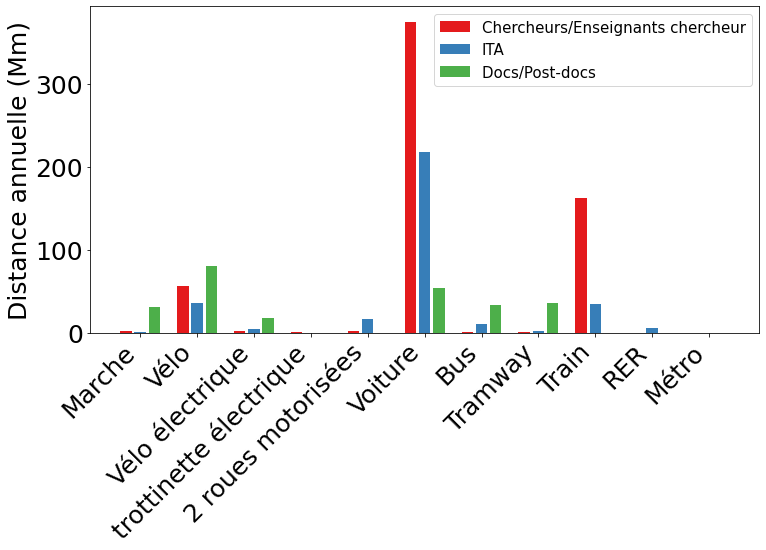

In [24]:
fig = plt.figure(facecolor='white', figsize=(12, 6))
plt.rcParams['font.size'] = 25
ax = plt.gca()
x = np.array([0, 5, 10])
labelout = ['Chercheurs/Enseignants chercheur', 'ITA', 'Docs/Post-docs ']
offset = 20
width = 4
xlabels = []
for c in distance_cols:
    l = plt.bar(x, test[c] / 1000, width=width, color=colors)
    xlabels.append(x[1])
    x += offset

ax.set_xticks(xlabels)
ax.set_xticklabels(types, ha='right', rotation=45)
plt.ylabel('Distance annuelle (Mm)')

plt.legend(l, labelout, fontsize=15)
plt.savefig('distance_by_cat.png', bbox_inches='tight')

In [ ]:
totsum = data.sum(axis=0)
totsum

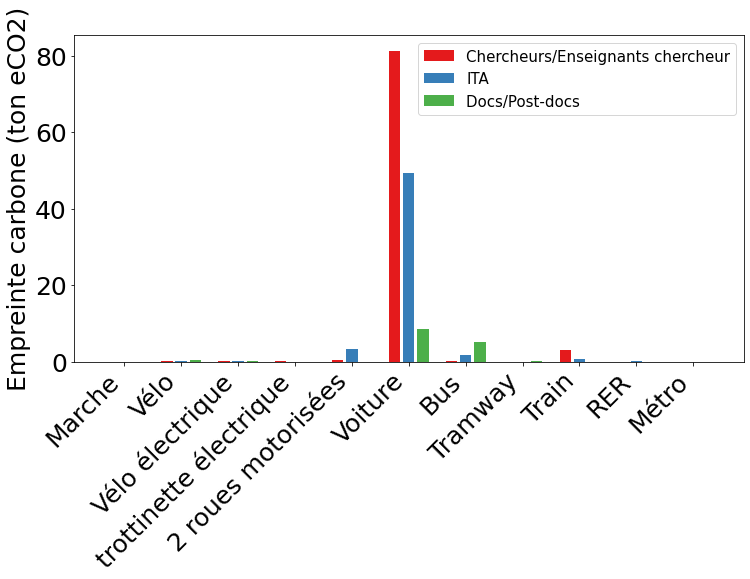

In [25]:
fig = plt.figure(facecolor='white', figsize=(12, 6))
plt.rcParams['font.size'] = 25
ax = plt.gca()
x = np.array([0, 5, 10])
offset = 20
width = 4
xlabels = []
for c in emissions_cols:
    l = plt.bar(x, test[c] / 1000, width=width, color=colors)
    xlabels.append(x[1])
    x += offset

ax.set_xticks(xlabels)
ax.set_xticklabels(types, ha='right', rotation=45)
plt.ylabel('Empreinte carbone (ton eCO2)')

plt.legend(l, labelout, fontsize=15)
plt.savefig('emssions_by_cat.png', bbox_inches='tight')

In [ ]:
emissions = test.loc[:, emissions_cols]
emissions

In [ ]:
emissions_tot = np.sum(emissions.values)
emissions_tot

In [ ]:
emissions_norm = (emissions / emissions_tot) * 100
emissions_norm

In [ ]:
fig = plt.figure(facecolor='white', figsize=(12, 6))
ax = plt.gca()
x = np.arange(0, len(types))
index = emissions_norm.index
index
temp = 0
lll = []
for i in range(len(index)):
    print(i, index[i])
    l = plt.bar(x, emissions_norm.loc[index[i], :], bottom=temp, color=colors[i])
    lll.append(l)
    temp += emissions_norm.loc[index[i], :]
t = ax.set_xticks(x)
ax.set_xticklabels(types, ha='right', rotation=45)
plt.legend(lll, index)
plt.xlabel('% des emissions')

In [ ]:
emissions_norm.sum(axis=0)

In [ ]:
distances = test.loc[:, distance_cols]
distances

In [ ]:
distances_tot = np.sum(distances.values)
distances_tot

In [ ]:
distances_norm = distances / distances_tot * 100
distances_norm

In [ ]:
distances_norm.sum(axis=0)